In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
hmeq=pd.read_csv(r"C:\Users\chemm\Desktop\cours\MOSEF\Python\Exercice\Scoring\Projet_scoring\data\hmeq.csv")
hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


Traiement des outliers en remplacant par le 99percentiles

In [4]:

numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for col in numeric_columns:
    upper_limit = hmeq[col].quantile(0.99)
    hmeq[col] = np.where(hmeq[col] > upper_limit, upper_limit, hmeq[col])
print("Statistiques descriptives après limitation des valeurs extrêmes :")
print(hmeq[numeric_columns].describe())
filtered_hmeq=hmeq

Statistiques descriptives après limitation des valeurs extrêmes :
               LOAN        MORTDUE          VALUE          YOJ        DEROG  \
count   5960.000000    5442.000000    5848.000000  5445.000000  5252.000000   
mean   18469.083893   73348.848172  100923.156505     8.900964     0.231721   
std    10540.219148   42349.225901   51730.977747     7.505444     0.685430   
min     1100.000000    2063.000000    8000.000000     0.000000     0.000000   
25%    11100.000000   46276.000000   66075.500000     3.000000     0.000000   
50%    16300.000000   65019.000000   89235.500000     7.000000     0.000000   
75%    23300.000000   91488.000000  119824.250000    13.000000     0.000000   
max    60869.000000  232230.410000  289962.800000    30.000000     4.000000   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.000000  5652.000000  5450.000000  5738.000000  4693.000000  
mean      0.428067   178.572904     1.167349    21.237191    33.560672  
std

In [5]:
filtered_hmeq.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18469.083893,73348.848172,100923.156505,8.900964,0.231721,0.428067,178.572904,1.167349,21.237191,33.560672
std,0.399656,10540.219148,42349.225901,51730.977747,7.505444,0.685430,0.995170,80.320057,1.630953,9.939351,7.311299
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,60869.000000,232230.410000,289962.800000,30.000000,4.000000,5.000000,399.544930,8.510000,50.000000,49.220262


In [6]:
MissingData = hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
MissingData['Percentage Missing'] = (MissingData['Missing Values'] / len(hmeq)) * 100
MissingData = MissingData.sort_values(by='Percentage Missing', ascending=False)
MissingData

,Variables,Missing Values,Percentage Missing
12,DEBTINC,1267,21.258389
7,DEROG,708,11.879195
8,DELINQ,580,9.731544
2,MORTDUE,518,8.691275
6,YOJ,515,8.640940
10,NINQ,510,8.557047
9,CLAGE,308,5.167785
5,JOB,279,4.681208
4,REASON,252,4.228188
11,CLNO,222,3.724832


In [7]:
filtered_hmeq.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18469.083893,73348.848172,100923.156505,8.900964,0.231721,0.428067,178.572904,1.167349,21.237191,33.560672
std,0.399656,10540.219148,42349.225901,51730.977747,7.505444,0.685430,0.995170,80.320057,1.630953,9.939351,7.311299
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,60869.000000,232230.410000,289962.800000,30.000000,4.000000,5.000000,399.544930,8.510000,50.000000,49.220262


In [8]:
# Imputation des valeurs manquantes pour les variables numériques avec la médiane
for col in ['DEBTINC', 'DEROG', 'DELINQ', 'MORTDUE', 'YOJ', 'NINQ', 'CLAGE', 'CLNO', 'VALUE']:
    filtered_hmeq[col] = filtered_hmeq[col].fillna(filtered_hmeq[col].median())

filtered_hmeq.describe()

C:\Users\chemm\AppData\Local\Temp\ipykernel_59140\981784581.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_hmeq[col].fillna(filtered_hmeq[col].median(), inplace=True)
C:\Users\chemm\AppData\Local\Temp\ipykernel_59140\981784581.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves a

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18469.083893,72624.878146,100703.522691,8.736703,0.204195,0.386409,178.309025,1.153029,21.191107,33.828015
std,0.399656,10540.219148,40534.724019,51267.102433,7.193650,0.647778,0.953975,78.224956,1.560302,9.755264,6.508016
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892
max,1.000000,60869.000000,232230.410000,289962.800000,30.000000,4.000000,5.000000,399.544930,8.510000,50.000000,49.220262


In [9]:


# Imputation des valeurs manquantes pour les variables catégorielles avec la valeur la plus fréquente
for col in ['JOB', 'REASON']:
    filtered_hmeq[col].fillna(filtered_hmeq[col].mode()[0], inplace=True)


C:\Users\chemm\AppData\Local\Temp\ipykernel_59140\2831176708.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  filtered_hmeq[col].fillna(filtered_hmeq[col].mode()[0], inplace=True)


In [10]:
filtered_hmeq.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000,5960.000000
mean,0.199497,18469.083893,72624.878146,100703.522691,8.736703,0.204195,0.386409,178.309025,1.153029,21.191107,33.828015
std,0.399656,10540.219148,40534.724019,51267.102433,7.193650,0.647778,0.953975,78.224956,1.560302,9.755264,6.508016
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,48139.000000,66489.500000,3.000000,0.000000,0.000000,117.371430,0.000000,15.000000,30.763159
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,88200.250000,119004.750000,12.000000,0.000000,0.000000,227.143058,2.000000,26.000000,37.949892
max,1.000000,60869.000000,232230.410000,289962.800000,30.000000,4.000000,5.000000,399.544930,8.510000,50.000000,49.220262


In [11]:
MissingData = filtered_hmeq.isnull().sum().rename_axis('Variables').reset_index(name='Missing Values')
MissingData['Percentage Missing'] = (MissingData['Missing Values'] / len(filtered_hmeq)) * 100
MissingData = MissingData.sort_values(by='Percentage Missing', ascending=False)
MissingData

,Variables,Missing Values,Percentage Missing
0,BAD,0,0.0
1,LOAN,0,0.0
2,MORTDUE,0,0.0
3,VALUE,0,0.0
4,REASON,0,0.0
5,JOB,0,0.0
6,YOJ,0,0.0
7,DEROG,0,0.0
8,DELINQ,0,0.0
9,CLAGE,0,0.0


In [12]:
from sklearn.preprocessing import StandardScaler

# Initialiser le standard scaler
scaler = StandardScaler()

# Appliquer aux variables numériques
numeric_columns = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
filtered_hmeq[numeric_columns] = scaler.fit_transform(filtered_hmeq[numeric_columns])


In [13]:
# Encodage one-hot des variables catégorielles
filtered_hmeq = pd.get_dummies(filtered_hmeq, columns=['REASON', 'JOB'], drop_first=True)


In [14]:
# Calculer la matrice de corrélation
corr_matrix = filtered_hmeq.corr()
bad_corr = corr_matrix['BAD'].sort_values(ascending=False)
print("Corrélations avec BAD :\n", bad_corr)


Corrélations avec BAD :
 BAD               1.000000
DELINQ            0.351488
DEROG             0.282108
NINQ              0.171233
DEBTINC           0.128391
JOB_Sales         0.050934
JOB_Self          0.046245
JOB_Other         0.037949
REASON_HomeImp    0.037517
CLNO             -0.011115
JOB_ProfExe      -0.043561
MORTDUE          -0.052781
YOJ              -0.055725
VALUE            -0.059022
JOB_Office       -0.073613
LOAN             -0.076543
CLAGE            -0.178306
Name: BAD, dtype: float64


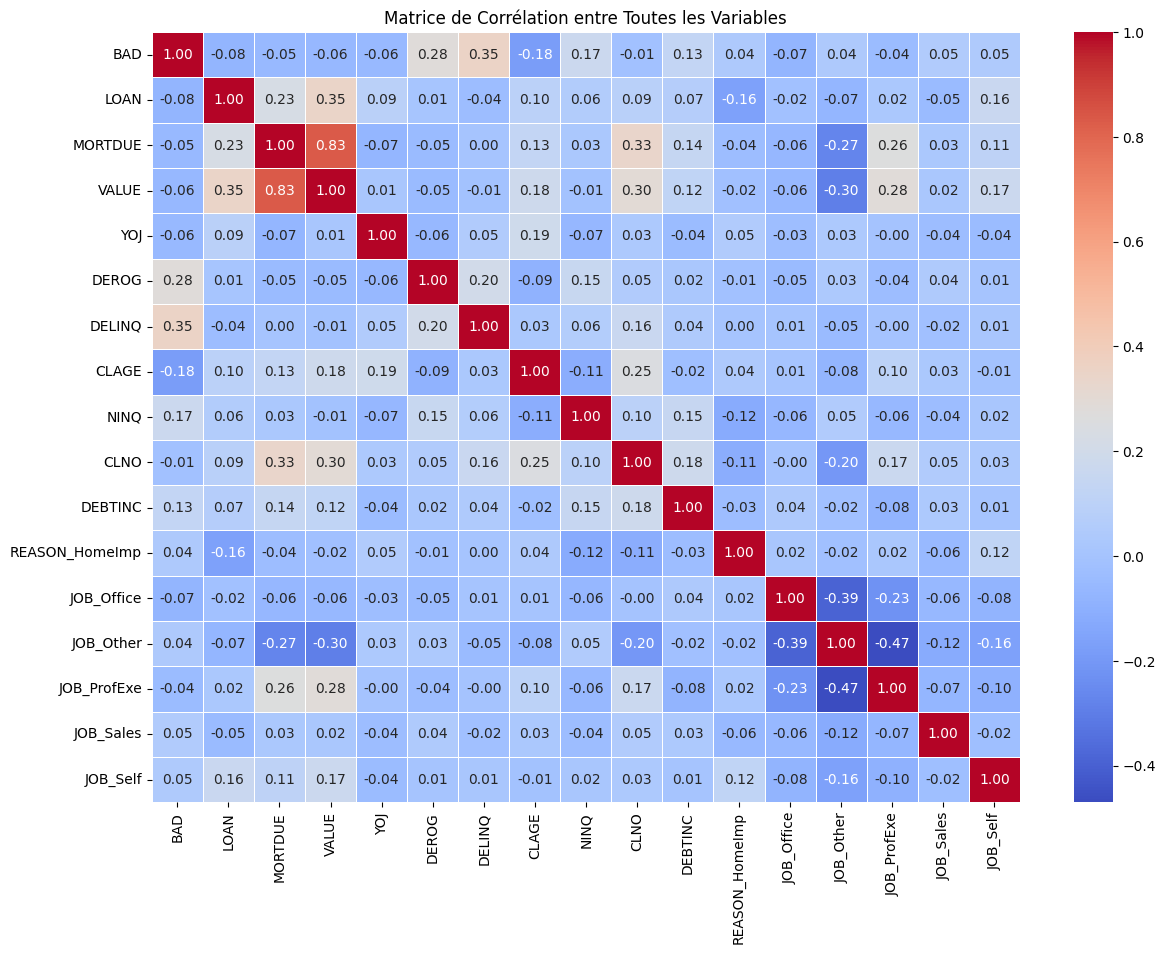

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcul de la matrice de corrélation
corr_matrix = filtered_hmeq.corr()

# Visualisation de la matrice de corrélation
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matrice de Corrélation entre Toutes les Variables')
plt.show()


In [16]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Sélection des variables numériques pour le calcul du VIF
X = filtered_hmeq.select_dtypes(include=['float64', 'int64'])
X = add_constant(X)  # Ajouter une constante pour le VIF

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


   Variable       VIF
0     const  1.322149
1       BAD  1.292662
2      LOAN  1.178717
3   MORTDUE  3.435427
4     VALUE  3.590596
5       YOJ  1.075441
6     DEROG  1.125719
7    DELINQ  1.204137
8     CLAGE  1.174623
9      NINQ  1.087530
10     CLNO  1.263404
11  DEBTINC  1.082490


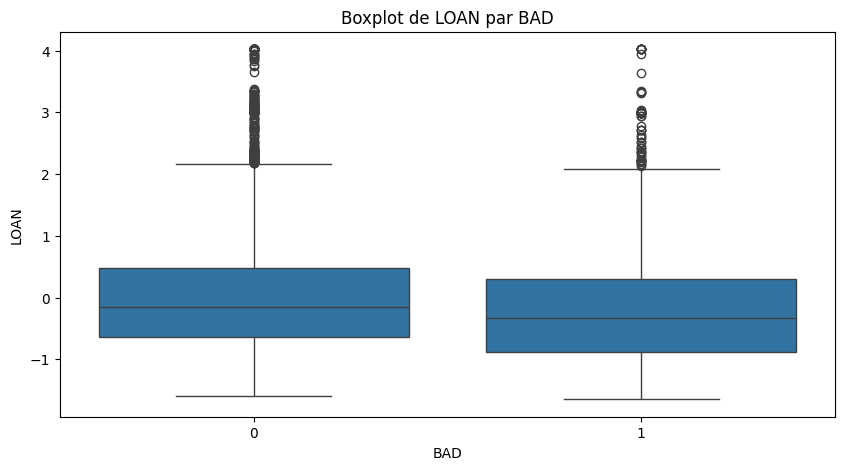

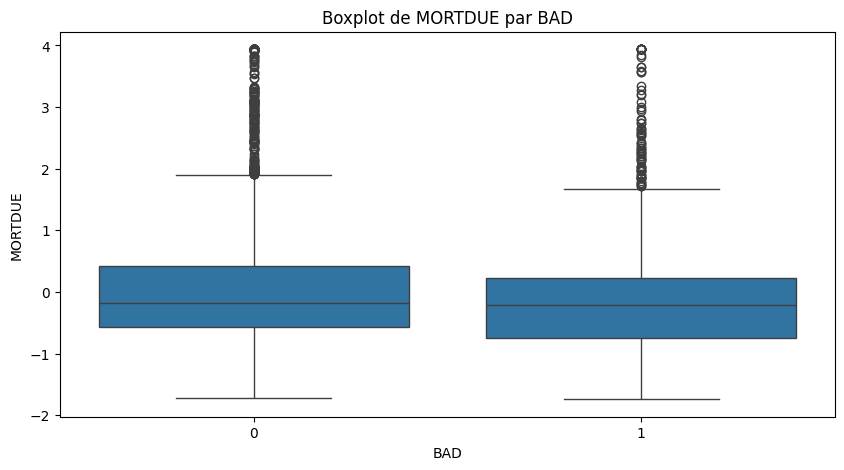

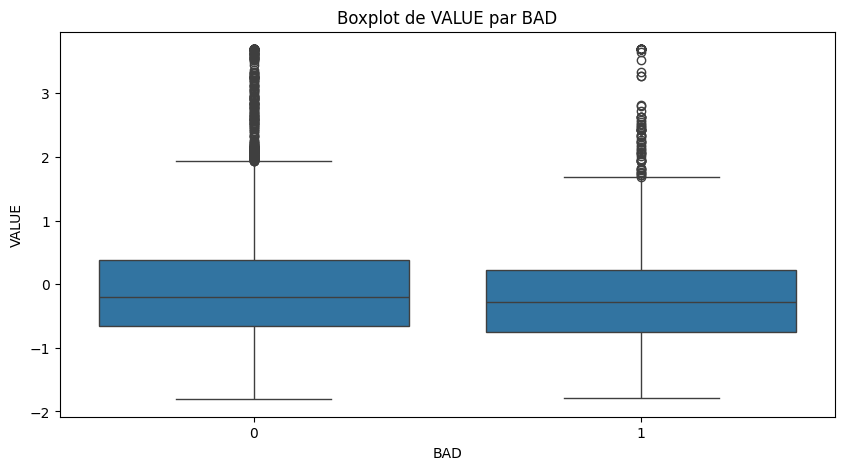

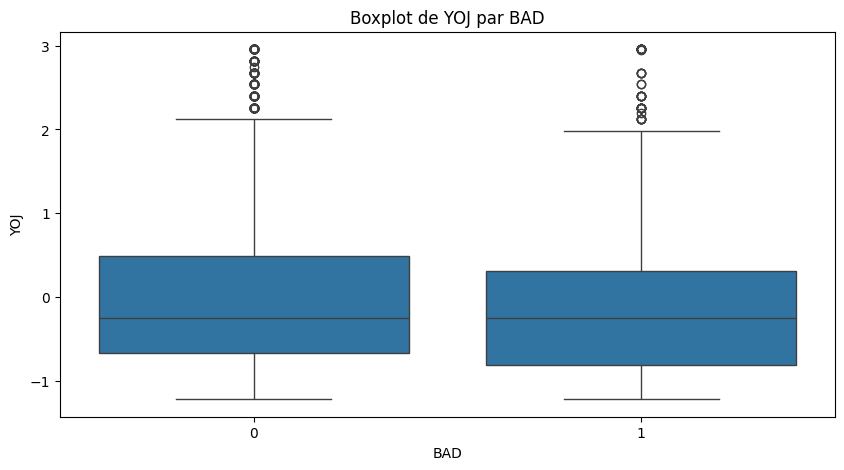

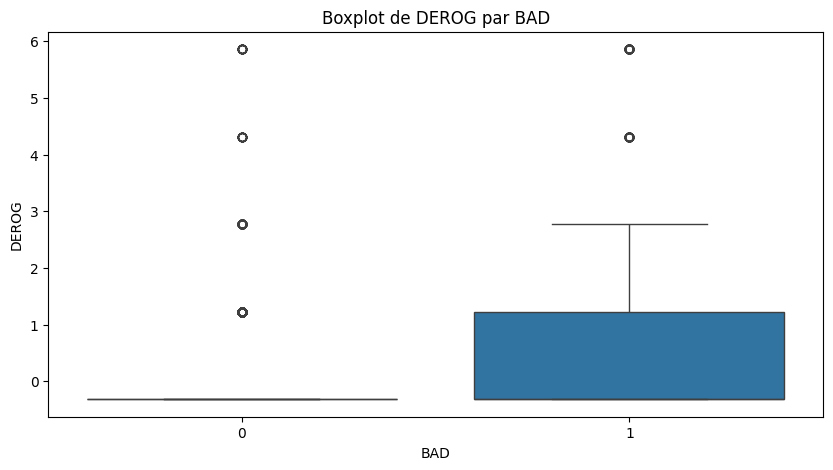

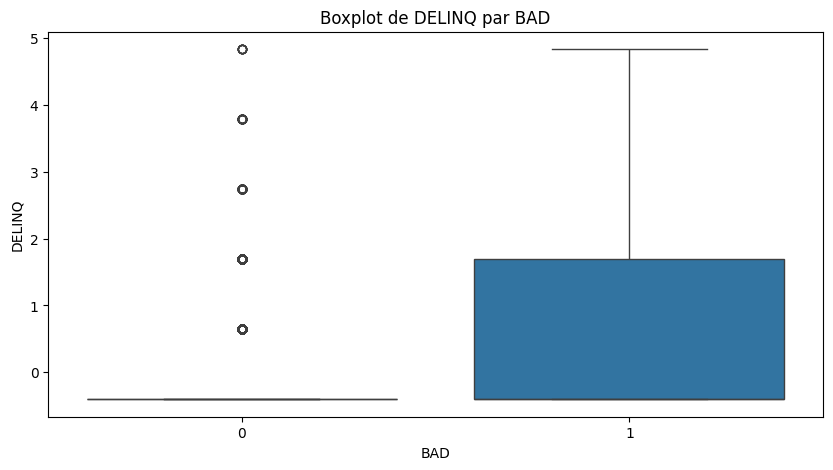

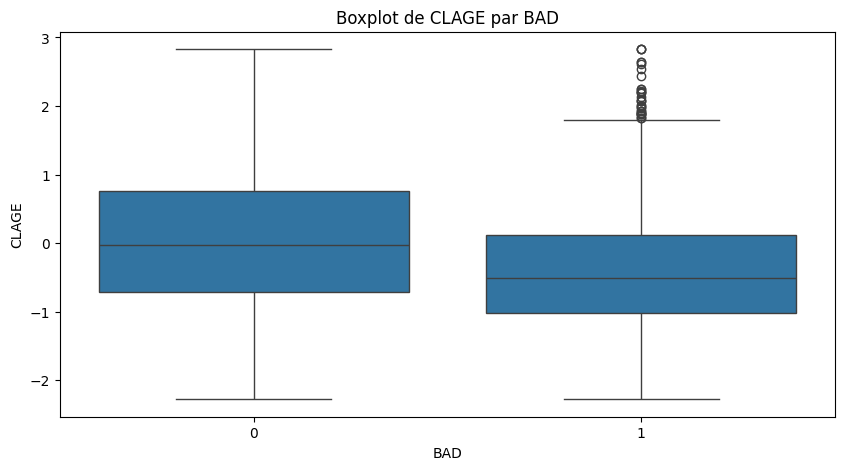

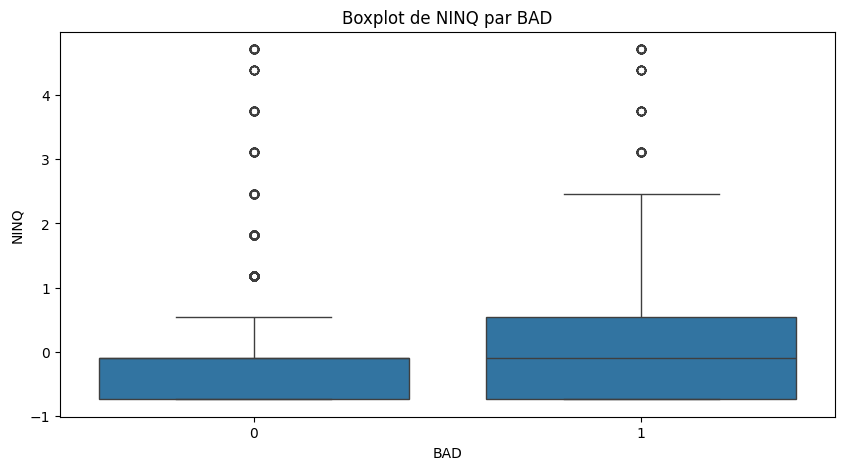

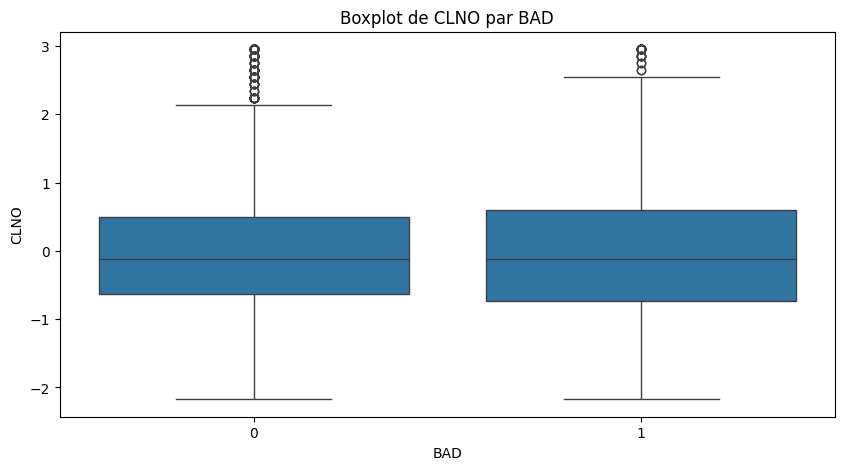

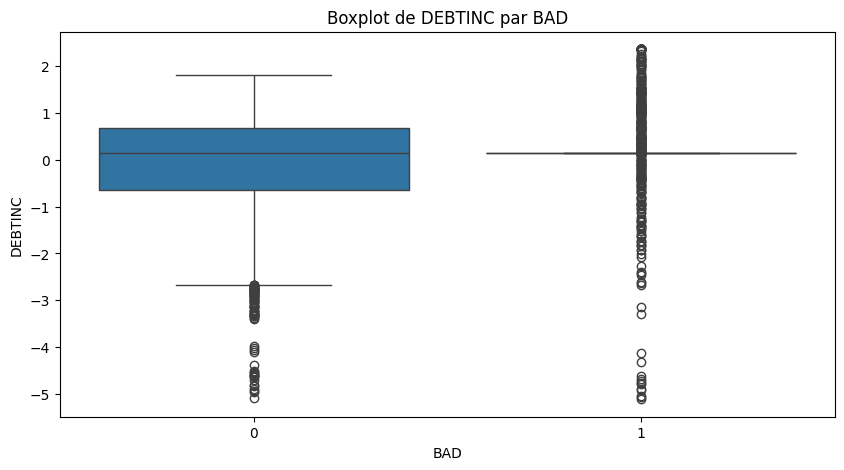

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x="BAD", y=col, data=filtered_hmeq)
    plt.title(f"Boxplot de {col} par BAD")
    plt.show()


In [18]:
# Créer la variable MORTGAGE_TO_VALUE_RATIO
filtered_hmeq['MORTGAGE_TO_VALUE_RATIO'] = filtered_hmeq['MORTDUE'] / (filtered_hmeq['VALUE'] + 1)  # +1 pour éviter la division par zéro

# Vérifier les statistiques de la nouvelle variable
print(filtered_hmeq.describe())


               BAD          LOAN      MORTDUE         VALUE           YOJ  \
count  5960.000000  5.960000e+03  5960.000000  5.960000e+03  5.960000e+03   
mean      0.199497 -2.288997e-16     0.000000  1.907497e-17 -9.060612e-17   
std       0.399656  1.000084e+00     1.000084  1.000084e+00  1.000084e+00   
min       0.000000 -1.648025e+00    -1.740922 -1.808398e+00 -1.214604e+00   
25%       0.000000 -6.991982e-01    -0.604122 -6.674240e-01 -7.975345e-01   
50%       0.000000 -2.058084e-01    -0.187654 -2.237104e-01 -2.414419e-01   
75%       0.000000  4.583701e-01     0.384280  3.570079e-01  4.536738e-01   
max       1.000000  4.023016e+00     3.937832  3.691942e+00  2.956091e+00   

              DEROG        DELINQ         CLAGE          NINQ          CLNO  \
count  5.960000e+03  5.960000e+03  5.960000e+03  5.960000e+03  5.960000e+03   
mean  -6.557022e-18  7.153115e-18  1.239873e-16  4.768743e-18  4.768743e-17   
std    1.000084e+00  1.000084e+00  1.000084e+00  1.000084e+00  1.0000

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Sélectionner les colonnes numériques
X = filtered_hmeq.select_dtypes(include=['float64', 'int64'])
X = add_constant(X)

# Calculer le VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   Variable       VIF
0                     const  1.322757
1                       BAD  1.292842
2                      LOAN  1.178854
3                   MORTDUE  3.436083
4                     VALUE  3.592356
5                       YOJ  1.075443
6                     DEROG  1.125720
7                    DELINQ  1.204140
8                     CLAGE  1.174640
9                      NINQ  1.087540
10                     CLNO  1.263538
11                  DEBTINC  1.082802
12  MORTGAGE_TO_VALUE_RATIO  1.001120


Dans l'ensemble, vos variables présentent peu ou pas de multicolinéarité problématique. Tous les VIF sont inférieurs à 5, ce qui est un bon indicateur. En général, un VIF inférieur à 5 est considéré comme acceptable pour la plupart des modèles, et un VIF inférieur à 10 est tolérable.

MORTDUE et VALUE montrent une légère redondance, mais cela reste dans des limites acceptables. Vous pouvez choisir de les conserver telles quelles, car elles n’indiquent pas une multicolinéarité suffisamment importante pour nécessiter une transformation ou une suppression.

Aucune action n’est strictement nécessaire ici, car tous les VIF sont faibles. Vous pouvez procéder à l'analyse ou la modélisation en toute confiance.

Ces résultats indiquent que votre modèle devrait être relativement stable, et que la multicolinéarité ne devrait pas biaiser significativement les coefficients d’un modèle de régression linéaire. Cela signifie également que vos prédictions devraient être robustes sans besoin de supprimer ou de combiner davantage de variables.

In [20]:
filtered_hmeq.head()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,REASON_HomeImp,JOB_Office,JOB_Other,JOB_ProfExe,JOB_Sales,JOB_Self,MORTGAGE_TO_VALUE_RATIO
0,1,-1.648025,-1.153796,-1.203183,0.245139,-0.31525,-0.405086,-1.073179,-0.098084,-1.249800,0.152171,True,False,True,False,False,False,5.678610
1,1,-1.629048,-0.063454,-0.630155,-0.241442,-0.31525,1.691581,-0.722026,-0.739040,-0.737213,0.152171,True,False,True,False,False,False,-0.171570
2,1,-1.610072,-1.458745,-1.638684,-0.658511,-0.31525,-0.405086,-0.368741,-0.098084,-1.147283,0.152171,True,False,True,False,False,False,2.283987
3,1,-1.610072,-0.187654,-0.223710,-0.241442,-0.31525,-0.405086,-0.061908,-0.098084,-0.122109,0.152171,False,False,True,False,False,False,-0.241732
4,0,-1.591095,0.621128,0.220364,-0.797535,-0.31525,-0.405086,-1.086390,-0.739040,-0.737213,0.152171,True,True,False,False,False,False,0.508969


Exactement, vos résultats indiquent que vous n'avez pas besoin de créer ou de supprimer des variables en raison de la multicolinéarité, malgré les corrélations observées dans la matrice de corrélation.

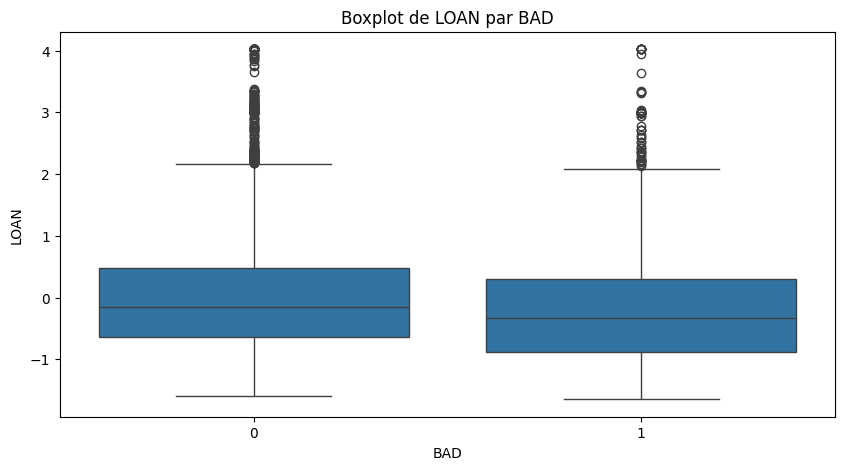

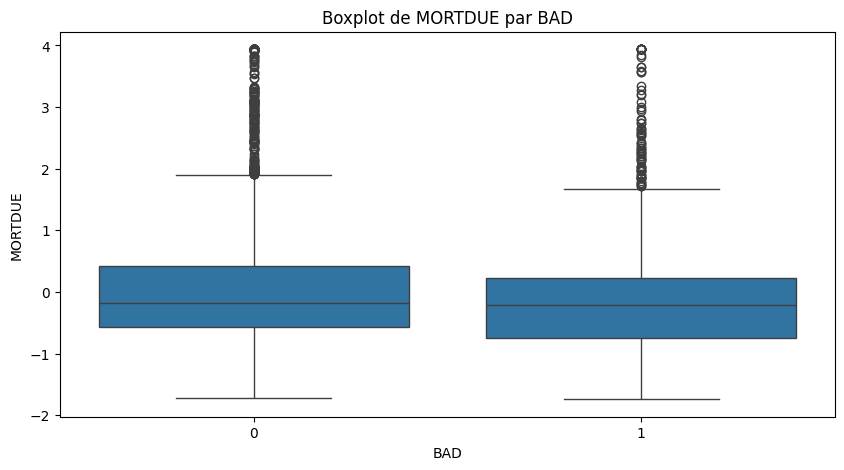

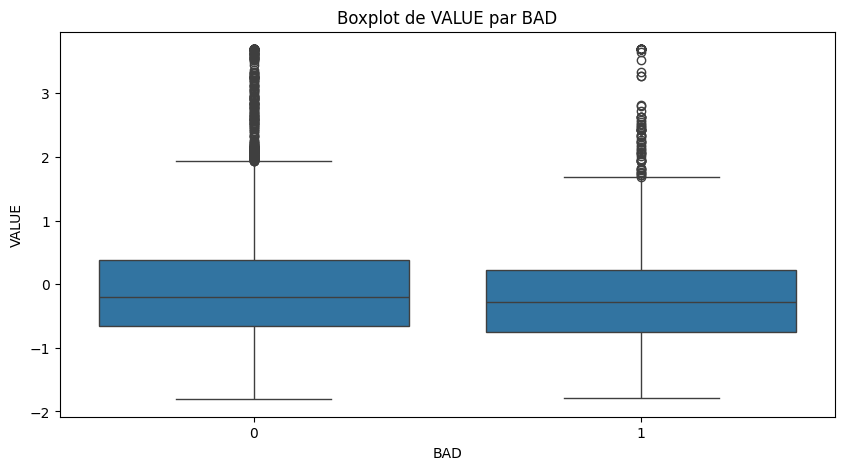

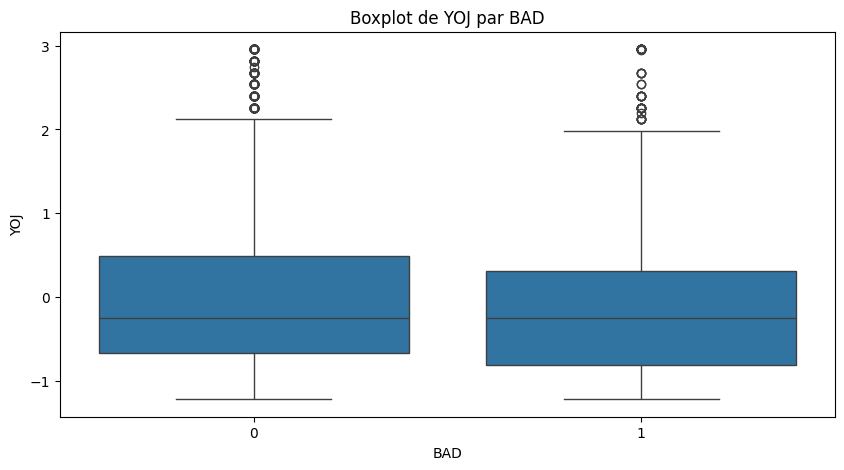

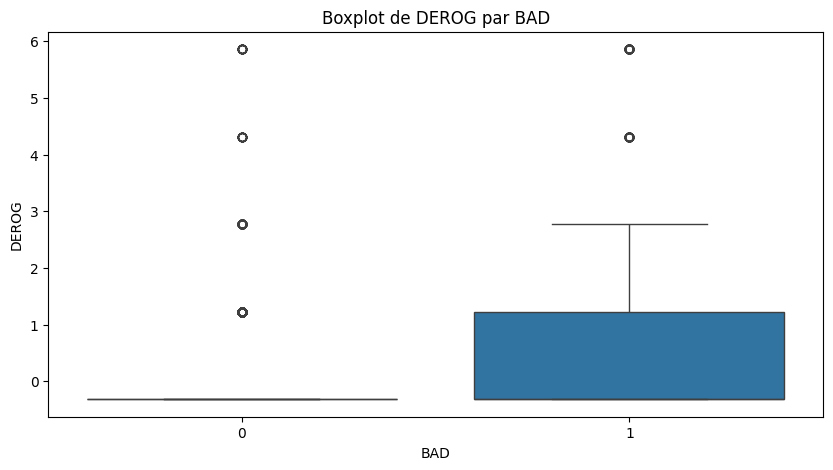

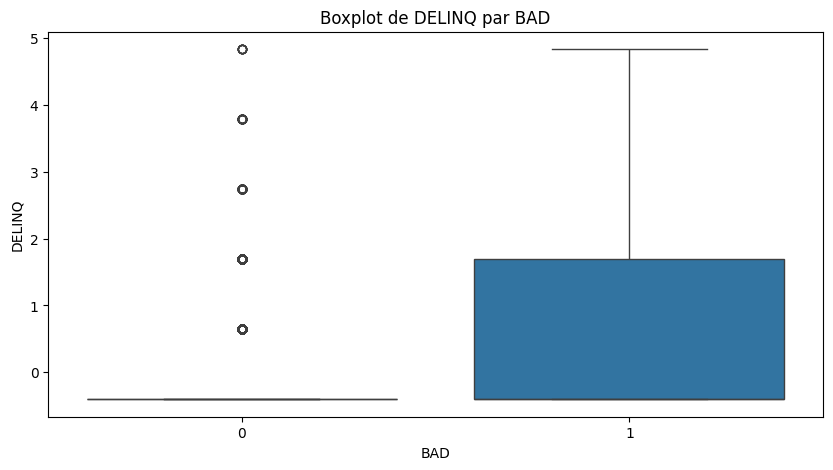

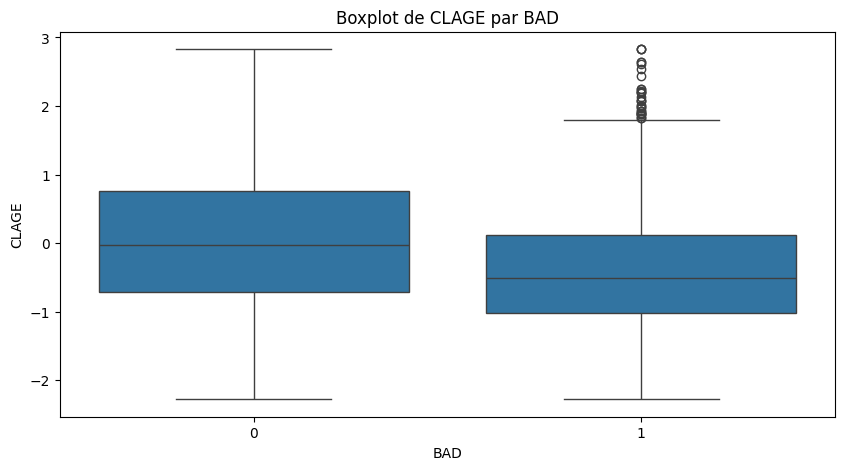

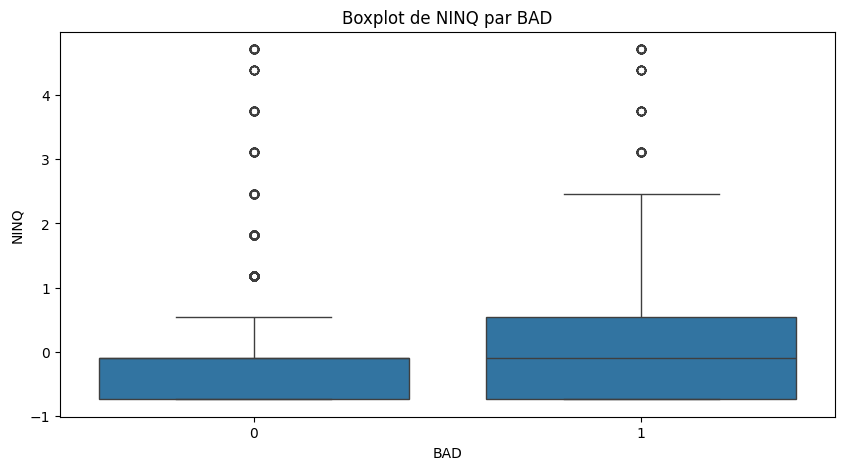

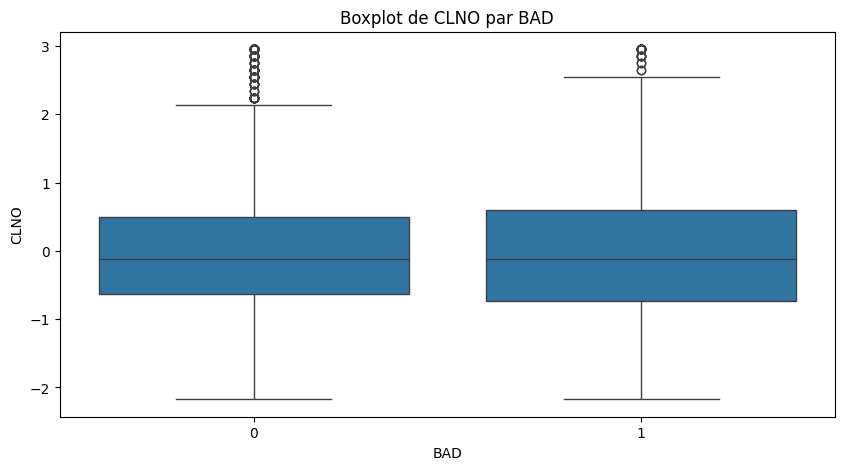

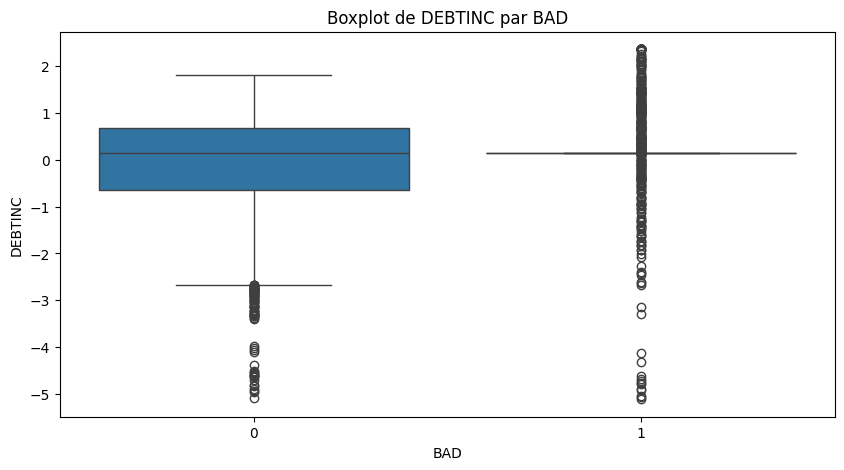

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x="BAD", y=col, data=filtered_hmeq)
    plt.title(f"Boxplot de {col} par BAD")
    plt.show()


Conclusions 

Variables Potentiellement Utiles : DEROG, DELINQ, et DEBTINC montrent des différences notables entre les groupes BAD = 0 et BAD = 1, ce qui suggère qu'elles pourraient être utiles pour prédire BAD.

Observations par Variable
LOAN :

Les distributions de LOAN pour les groupes BAD = 0 et BAD = 1 sont très similaires, bien que le groupe BAD = 1 ait une légère tendance à des valeurs plus élevées. Cependant, les différences ne semblent pas significatives, ce qui peut indiquer que LOAN seul n'est pas un prédicteur fort du défaut.
MORTDUE :

La distribution est aussi similaire entre les deux groupes. Il y a de nombreux outliers pour les deux groupes, ce qui pourrait indiquer que cette variable a une large gamme de valeurs dans les deux cas.
VALUE :

La distribution de VALUE entre les deux groupes est également assez proche, avec de nombreux outliers. Cela pourrait signifier que la valeur de la propriété n’est pas fortement discriminante en termes de risque de défaut (BAD).
YOJ (Années sur le poste actuel) :

Les distributions entre les groupes BAD = 0 et BAD = 1 sont assez similaires, bien que le groupe sans défaut (BAD = 0) semble avoir des valeurs légèrement plus élevées en moyenne. Cela pourrait indiquer que les emprunteurs ayant plus d’ancienneté dans leur emploi sont légèrement moins susceptibles de faire défaut.
DEROG (Rapports dérogatoires) :

Le groupe BAD = 1 montre une distribution avec des valeurs beaucoup plus élevées pour DEROG, suggérant que les emprunteurs ayant plus de rapports dérogatoires sont plus susceptibles de faire défaut.
Cette variable semble être un bon indicateur pour le risque de défaut, car il existe une différence notable entre les deux groupes.
DELINQ (Lignes de crédit en retard) :

Similaire à DEROG, DELINQ montre une distribution plus élevée pour BAD = 1. Les emprunteurs avec des retards de paiement sont donc également plus susceptibles de faire défaut. Cette variable est également un bon prédicteur potentiel.
CLAGE (Ancienneté de la ligne de crédit la plus ancienne) :

Les emprunteurs du groupe BAD = 0 ont une distribution légèrement plus étalée, avec des valeurs légèrement plus élevées que le groupe BAD = 1. Cela pourrait indiquer que les emprunteurs avec des antécédents de crédit plus longs ont moins de risque de défaut.
NINQ (Nombre d'enquêtes de crédit récentes) :

Les deux groupes présentent une distribution assez similaire, bien que BAD = 1 ait des valeurs légèrement plus élevées. Cela pourrait suggérer que les enquêtes de crédit récentes sont associées à un risque de défaut, mais la différence n'est pas très marquée.
CLNO (Nombre total de lignes de crédit) :

Les distributions pour CLNO sont également très similaires entre les groupes BAD = 0 et BAD = 1. Cela signifie que le nombre total de lignes de crédit n’a pas un impact fort sur la probabilité de défaut.
DEBTINC (Ratio dette/revenu) :

Le ratio dette/revenu semble être plus élevé pour le groupe BAD = 1, ce qui est logique, car un endettement plus élevé par rapport au revenu est souvent un indicateur de risque financier. Cette variable pourrait être un bon indicateur du risque de défaut.

In [22]:
filtered_hmeq['MORTDUE_DEBTINC'] = filtered_hmeq['MORTDUE'] * filtered_hmeq['DEBTINC']
filtered_hmeq['VALUE_LOAN'] = filtered_hmeq['VALUE'] * filtered_hmeq['LOAN']
filtered_hmeq['LOAN_DEBTINC'] = filtered_hmeq['LOAN'] * filtered_hmeq['DEBTINC']


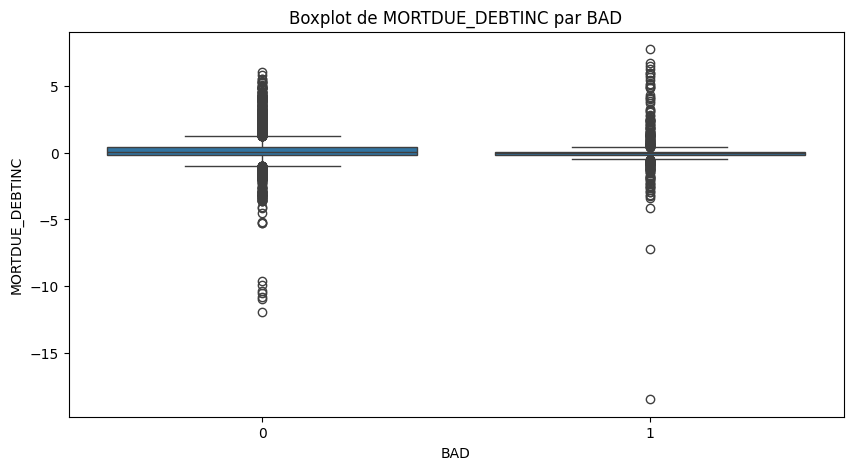

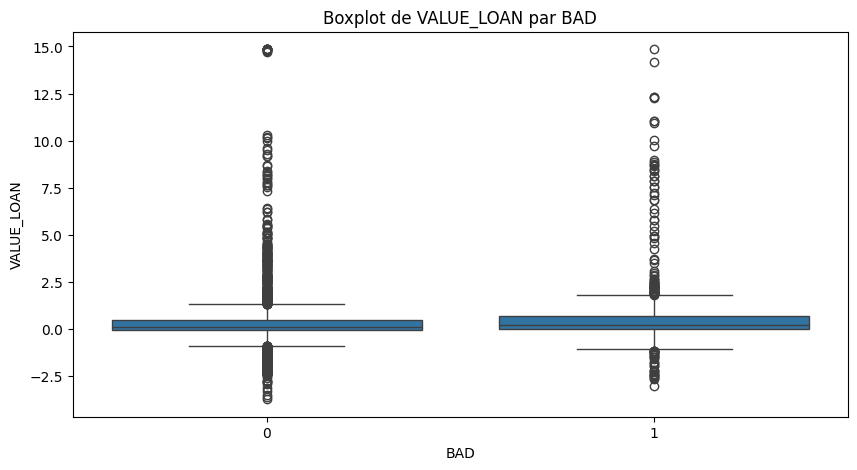

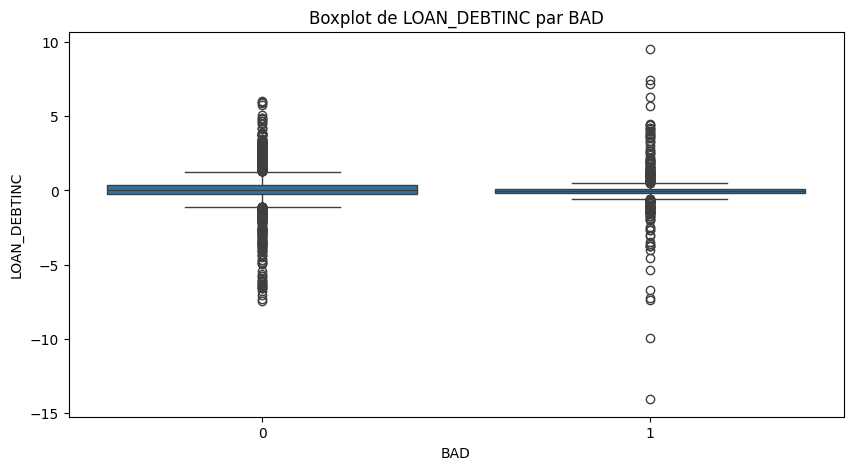

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot pour observer la relation avec BAD
for col in ['MORTDUE_DEBTINC', 'VALUE_LOAN', 'LOAN_DEBTINC']:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='BAD', y=col, data=filtered_hmeq)
    plt.title(f"Boxplot de {col} par BAD")
    plt.show()


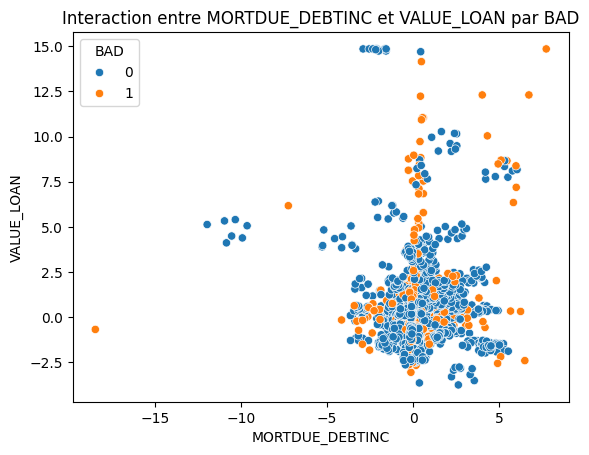

In [24]:
sns.scatterplot(x='MORTDUE_DEBTINC', y='VALUE_LOAN', hue='BAD', data=filtered_hmeq)
plt.title("Interaction entre MORTDUE_DEBTINC et VALUE_LOAN par BAD")
plt.show()


Observations sur les Boxplots

MORTDUE_DEBTINC :

La distribution de MORTDUE_DEBTINC est concentrée autour de zéro pour les deux groupes BAD = 0 et BAD = 1. Cependant, on observe des valeurs extrêmes plus fréquentes et plus élevées pour le groupe BAD = 1, surtout dans les valeurs négatives.
Cela pourrait indiquer que les individus avec des ratios hypothécaires et d’endettement plus élevés ont un risque de défaut plus important, même si cette tendance n’est pas fortement marquée.

VALUE_LOAN :

Pour VALUE_LOAN, les distributions sont aussi centrées autour de zéro pour les deux groupes. Il y a cependant plus d’outliers dans les valeurs positives pour BAD = 1, ce qui pourrait signaler un risque supplémentaire chez les individus ayant des valeurs de propriété et des montants de prêt élevés.
Les extrêmes dans la distribution positive pour BAD = 1 pourraient indiquer que lorsque la valeur de la propriété et le montant du prêt sont simultanément élevés, cela pourrait être un facteur de risque.

LOAN_DEBTINC :

Le comportement est similaire aux deux premières variables, avec une concentration autour de zéro et des valeurs extrêmes plus prononcées pour BAD = 1.
Il est possible que les individus ayant un ratio d’endettement élevé combiné à des montants de prêt plus élevés aient un risque de défaut accru.


Analyse du Scatter Plot
Le scatter plot montrant l’interaction entre MORTDUE_DEBTINC et VALUE_LOAN par BAD semble révéler quelques zones où les points BAD = 1 sont plus concentrés, notamment dans des zones avec des valeurs positives de VALUE_LOAN et des valeurs extrêmes de MORTDUE_DEBTINC.

Cependant, la distribution reste relativement diffuse, ce qui indique qu’aucune séparation nette n’est visible entre les deux groupes. Cela signifie que, bien que ces variables d’interaction puissent apporter des informations, elles ne suffiront probablement pas à elles seules pour discriminer efficacement les deux classes.


Conclusions et Recommandations
Inclusion dans le Modèle :
Même si les différences entre les distributions ne sont pas flagrantes, il peut être intéressant d'inclure ces variables d’interaction dans votre modèle pour voir si elles améliorent la performance. Dans certains modèles, les interactions peuvent capturer des variations subtiles qui augmentent la précision du modèle.


Autres Types d'Interactions :
Vous pouvez explorer d'autres interactions possibles entre MORTDUE, VALUE, LOAN, et d’autres variables ayant un lien avec BAD, comme DEROG et DELINQ, pour voir si des combinaisons supplémentaires montrent des patterns plus clairs.
Utilisation dans des Modèles Non-Linéaires :
Ces interactions peuvent être particulièrement bénéfiques dans des modèles non-linéaires comme les arbres de décision ou le gradient boosting, qui capturent plus efficacement les interactions complexes entre variables.

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Séparer les données en X et y
X = filtered_hmeq[['MORTDUE', 'VALUE', 'LOAN', 'MORTDUE_DEBTINC', 'VALUE_LOAN', 'LOAN_DEBTINC']]
y = filtered_hmeq['BAD']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)


# Initialiser et entraîner le modèle
model = LogisticRegression()
model.fit(X_train, y_train)

# Prédire et évaluer le modèle
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))


from sklearn.ensemble import RandomForestClassifier

# Entraîner une forêt aléatoire avec les nouvelles variables d'interaction
rf_model = model = RandomForestClassifier(class_weight={0: 1, 1: 10}, random_state=42)
rf_model.fit(X_train, y_train)

# Importance des caractéristiques
feature_importances = pd.DataFrame(rf_model.feature_importances_, index=X.columns, columns=['Importance']).sort_values(by='Importance', ascending=False)
print(feature_importances)


              precision    recall  f1-score   support

           0       0.83      0.63      0.72      1389
           1       0.30      0.56      0.39       399

    accuracy                           0.62      1788
   macro avg       0.57      0.60      0.56      1788
weighted avg       0.71      0.62      0.65      1788

                 Importance
MORTDUE_DEBTINC    0.182992
LOAN_DEBTINC       0.181816
MORTDUE            0.167442
VALUE              0.159489
LOAN               0.158030
VALUE_LOAN         0.150231
